In [120]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
path = 'https://raw.githubusercontent.com/medamer/B2P-data/main/Combined_dataset.csv'
df = pd.read_csv(path)

In [122]:
df.head()

,Bridge Name,Bridge Opportunity: Project Code,Bridge Opportunity: Needs Assessment,Bridge Opportunity: Level 1 Government,Bridge Opportunity: Level 2 Government,Bridge Opportunity: GPS (Latitude),Bridge Opportunity: GPS (Longitude),Bridge Opportunity: Bridge Type,Bridge Opportunity: Span (m),Bridge Opportunity: Individuals Directly Served,Bridge Opportunity: Comments,Current crossing method,Nearest all-weather crossing point,Days per year river is flooded,Flood duration during rainy season,Market access blocked by river,Education access blocked by river,Health access blocked by river,Other access blocked by river,Primary occupations,Primary crops grown,River crossing deaths in last 3 years,River crossing injuries in last 3 years,Cell service quality,4WD Accessibility,Name of nearest city,Name of nearest paved or sealed road,Bridge classification,Flag for Rejection,Rejection Reason,Bridge Type,Estimated span (m),Height differential between banks,Bridge Opportunity: CaseSafeID,Country,B2P Fiscal Year,Project Type,Good Site
0,Bukinga,1009317,Rwanda Needs Assessment 2018,Southern Province,Nyaruguru,-2.760833,29.488056,Suspended Bridge,NaN,NaN,Steep slopes to deal with for anchors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Huye,NaN,NaN,Yes,There is a planned vehicular road with a vehic...,NaN,NaN,NaN,006f100000asFErAAM,NaN,NaN,NaN,0.0
1,Kagarama,1007325,NaN,Western Province,Nyamasheke,-2.322534,29.141944,Suspension Bridge,48.0,4000.0,NaN,Timber Bridge,2 km,120.0,12hours,"Schools, hospital, markets and government serv...",NaN,NaN,NaN,farming,banana,2.0,15.0,Fair,Seasonally,Kibogora-Kabuga,Karongi-Nyamasheke,NaN,NaN,NaN,NaN,10.0,0.7,006f100000a82QzAAI,NaN,NaN,NaN,1.0
2,Karambi,1007374,NaN,Southern Province,Huye,-2.513333,29.612778,Suspension Bridge,50.0,12500.0,Likely piloting steel decking on this bridge. ...,Timber Bridge,5 km,60.0,1day,"Markets,farms blocked by this river both sides",Education blocked by this river both sides,Health services blocked by this river both sides,"Potable water, places of worship ,places for r...",Farming and small business,"banana, bean, corn",3.0,15.0,Good,Never,Nyamagabe,Huye-Nyamagabe,Standard,NaN,NaN,Suspension,45.0,1.0,006f100000a86DaAAI,NaN,NaN,NaN,1.0
3,Rugeti,1007466,Rwanda Needs Assessment 2018,Southern Province,Nyamagabe,-2.476407,29.420800,Suspension Bridge,68.0,4363.0,"3000-6000 people directly served, Elevation:21...",Timber,None,60.0,All time in April and May and it is rarely to ...,Markets,Primary and Secondary schools,Health Center,Churches and Government offices,"Farming of large tea plantation, wheat farms","bean, cow pea, sweet potato, tea, wheat",0.0,2.0,Fair,Seasonally,Huye,Nyamagabe-Rusizi,Standard,No,NaN,Suspended,47.4,1.1,006f100000a86F4AAI,NaN,NaN,NaN,1.0
4,Nyakabuye - Nkomane,1007495,Rwanda Needs Assessment 2018,Southern Province,Nyamagabe,-2.233022,29.575130,Suspension Bridge,78.0,2790.0,"Not Duplicate 500-1000 people directly served,...",Timber Bridge,5 kilometers,35.0,"April To May, September to December, 12 hours ...","Birambo market, Gasura market, kirinda market(...","Groupe scholar Gasave( 1,2)","Kirinda Hospital(villages 1,2)",None,Farming,"bean, cassava, maiz, sorghum, sweet potato",4.0,4.0,Good,Never,Nyanza,Nyamagabe,Standard,No,NaN,Suspended,90.0,1.1,006f100000a86FXAAY,NaN,NaN,NaN,1.0


In [123]:
df.rename(columns={'Bridge Name': 'bridge_name',
                   'Bridge Opportunity: Project Code': 'bridge_opportunity_project_code',
                   'Bridge Opportunity: Needs Assessment': 'bridge_opportunity_needs_assessment',
                   'Bridge Opportunity: Level 1 Government': 'bridge_opportunity_level1_government',
                   'Bridge Opportunity: Level 2 Government': 'bridge_opportunity_level2_government',
                   'Bridge Opportunity: GPS (Latitude)': 'bridge_opportunity_gps_latitude',
                   'Bridge Opportunity: GPS (Longitude)': 'bridge_opportunity_gps_longitude',
                   'Bridge Opportunity: Bridge Type': 'bridge_opportunity_bridge_type',
                   'Bridge Opportunity: Span (m)': 'bridge_opportunity_span_m',
                   'Bridge Opportunity: Individuals Directly Served': 'bridge_opportunity_individuals_directly_served',
                   'Bridge Opportunity: Comments': 'bridge_opportunity_comments',
                   'Current crossing method': 'current_crossing_method',
                   'Nearest all-weather crossing point': 'nearest_all_weather_crossing_point',
                   'Days per year river is flooded': 'days_per_year_river_is_flooded',
                   'Flood duration during rainy season': 'flood_duration_during_rainy_season',
                   'Market access blocked by river': 'market_access_blocked_by_river',
                   'Education access blocked by river': 'education_access_blocked_by_river',
                   'Health access blocked by river': 'health_access_blocked_by_river',
                   'Other access blocked by river': 'other_access_blocked_by_river', 'Primary occupations': 'primary_occupations',
                   'Primary crops grown': 'primary_crops_grown',
                   'River crossing deaths in last 3 years': 'river_crossing_deaths_in_last_3_years',
                   'River crossing injuries in last 3 years': 'river_crossing_injuries_in_last_3_years',
                   'Cell service quality': 'incident_descriptions',
                   '4WD Accessibility': 'four_wd _accessibility', 'Name of nearest city': 'name_of_nearest_city',
                   'Name of nearest paved or sealed road': 'name_of_nearest_paved_or_sealed_road',
                   'Bridge classification': 'bridge_classification', 'Flag for Rejection': 'flag_for_rejection',
                   'Rejection Reason': 'rejection_reason', 'Bridge Type': 'bridge_type',
                   'Estimated span (m)': 'estimated_span_m', 'Height differential between banks': 'height_differential_between_banks',
                   'Bridge Opportunity: CaseSafeID': 'bridge_opportunity_casesafeid', 'Country': 'country',
                   'B2P Fiscal Year': 'b2p_fiscal_year',
                   'Project Type': 'project_type', 'Good Site': 'good_site'}, inplace=True)
df.columns

Index(['bridge_name', 'bridge_opportunity_project_code',
       'bridge_opportunity_needs_assessment',
       'bridge_opportunity_level1_government',
       'bridge_opportunity_level2_government',
       'bridge_opportunity_gps_latitude', 'bridge_opportunity_gps_longitude',
       'bridge_opportunity_bridge_type', 'bridge_opportunity_span_m',
       'bridge_opportunity_individuals_directly_served',
       'bridge_opportunity_comments', 'current_crossing_method',
       'nearest_all_weather_crossing_point', 'days_per_year_river_is_flooded',
       'flood_duration_during_rainy_season', 'market_access_blocked_by_river',
       'education_access_blocked_by_river', 'health_access_blocked_by_river',
       'other_access_blocked_by_river', 'primary_occupations',
       'primary_crops_grown', 'river_crossing_deaths_in_last_3_years',
       'river_crossing_injuries_in_last_3_years', 'incident_descriptions',
       'four_wd _accessibility', 'name_of_nearest_city',
       'name_of_nearest_paved_o

In [124]:
# Split the dataset:
# Positives:
# positive = (
#     (df['senior_engineering_review_conducted']=='Yes') & 
#     (df['bridge_opportunity_stage'].isin(['Complete', 'Prospecting', 'Confirmed', 'Under Construction']))
# )

# # Negatives:
# negative = (
#     (df['senior_engineering_review_conducted']=='Yes') & 
#     (df['bridge_opportunity_stage'].isin(['Rejected', 'Cancelled']))
# )

# # Unknown:
# unknown = df['senior_engineering_review_conducted'].isna()

In [125]:
# Create a new column named "Good Site." This is the target to predict.
# Assign a 1 for the positive class, 0 for the negative class and -1 for unkown class.
# df.loc[positive, 'good_site'] = 1
# df.loc[negative, 'good_site'] = 0
# df.loc[unknown, 'good_site'] = -1

In [126]:
# Because these columns were used to derive the target, 
# We can't use them as features, or it would be leakage.
# df = df.drop(columns=['senior_engineering_review_conducted', 'bridge_opportunity_stage'])
df['good_site'].value_counts()

-1.0    1383
 1.0     404
 0.0      24
Name: good_site, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


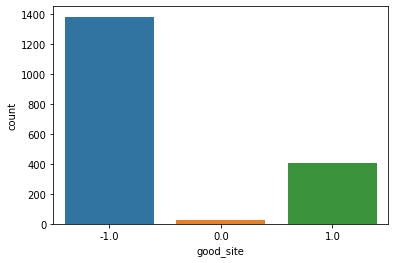

In [127]:
# Visualize how imbalanced data is:
sns.countplot(df['good_site']);

In [128]:
df.head()

,bridge_name,bridge_opportunity_project_code,bridge_opportunity_needs_assessment,bridge_opportunity_level1_government,bridge_opportunity_level2_government,bridge_opportunity_gps_latitude,bridge_opportunity_gps_longitude,bridge_opportunity_bridge_type,bridge_opportunity_span_m,bridge_opportunity_individuals_directly_served,bridge_opportunity_comments,current_crossing_method,nearest_all_weather_crossing_point,days_per_year_river_is_flooded,flood_duration_during_rainy_season,market_access_blocked_by_river,education_access_blocked_by_river,health_access_blocked_by_river,other_access_blocked_by_river,primary_occupations,primary_crops_grown,river_crossing_deaths_in_last_3_years,river_crossing_injuries_in_last_3_years,incident_descriptions,four_wd _accessibility,name_of_nearest_city,name_of_nearest_paved_or_sealed_road,bridge_classification,flag_for_rejection,rejection_reason,bridge_type,estimated_span_m,height_differential_between_banks,bridge_opportunity_casesafeid,country,b2p_fiscal_year,project_type,good_site
0,Bukinga,1009317,Rwanda Needs Assessment 2018,Southern Province,Nyaruguru,-2.760833,29.488056,Suspended Bridge,NaN,NaN,Steep slopes to deal with for anchors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Huye,NaN,NaN,Yes,There is a planned vehicular road with a vehic...,NaN,NaN,NaN,006f100000asFErAAM,NaN,NaN,NaN,0.0
1,Kagarama,1007325,NaN,Western Province,Nyamasheke,-2.322534,29.141944,Suspension Bridge,48.0,4000.0,NaN,Timber Bridge,2 km,120.0,12hours,"Schools, hospital, markets and government serv...",NaN,NaN,NaN,farming,banana,2.0,15.0,Fair,Seasonally,Kibogora-Kabuga,Karongi-Nyamasheke,NaN,NaN,NaN,NaN,10.0,0.7,006f100000a82QzAAI,NaN,NaN,NaN,1.0
2,Karambi,1007374,NaN,Southern Province,Huye,-2.513333,29.612778,Suspension Bridge,50.0,12500.0,Likely piloting steel decking on this bridge. ...,Timber Bridge,5 km,60.0,1day,"Markets,farms blocked by this river both sides",Education blocked by this river both sides,Health services blocked by this river both sides,"Potable water, places of worship ,places for r...",Farming and small business,"banana, bean, corn",3.0,15.0,Good,Never,Nyamagabe,Huye-Nyamagabe,Standard,NaN,NaN,Suspension,45.0,1.0,006f100000a86DaAAI,NaN,NaN,NaN,1.0
3,Rugeti,1007466,Rwanda Needs Assessment 2018,Southern Province,Nyamagabe,-2.476407,29.420800,Suspension Bridge,68.0,4363.0,"3000-6000 people directly served, Elevation:21...",Timber,None,60.0,All time in April and May and it is rarely to ...,Markets,Primary and Secondary schools,Health Center,Churches and Government offices,"Farming of large tea plantation, wheat farms","bean, cow pea, sweet potato, tea, wheat",0.0,2.0,Fair,Seasonally,Huye,Nyamagabe-Rusizi,Standard,No,NaN,Suspended,47.4,1.1,006f100000a86F4AAI,NaN,NaN,NaN,1.0
4,Nyakabuye - Nkomane,1007495,Rwanda Needs Assessment 2018,Southern Province,Nyamagabe,-2.233022,29.575130,Suspension Bridge,78.0,2790.0,"Not Duplicate 500-1000 people directly served,...",Timber Bridge,5 kilometers,35.0,"April To May, September to December, 12 hours ...","Birambo market, Gasura market, kirinda market(...","Groupe scholar Gasave( 1,2)","Kirinda Hospital(villages 1,2)",None,Farming,"bean, cassava, maiz, sorghum, sweet potato",4.0,4.0,Good,Never,Nyanza,Nyamagabe,Standard,No,NaN,Suspended,90.0,1.1,006f100000a86FXAAY,NaN,NaN,NaN,1.0


In [129]:
!pip install category_encoders

In [130]:
# Imports:
from collections import Counter
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [131]:
# Select features:
features = ['bridge_opportunity_gps_latitude', 'bridge_opportunity_gps_longitude',
            'bridge_opportunity_bridge_type', 'bridge_opportunity_span_m',
            'bridge_opportunity_individuals_directly_served','current_crossing_method',
            'nearest_all_weather_crossing_point', 'days_per_year_river_is_flooded',
            'flood_duration_during_rainy_season', 'market_access_blocked_by_river',
            'education_access_blocked_by_river', 'health_access_blocked_by_river',
            'other_access_blocked_by_river', 'primary_occupations',
            'primary_crops_grown', 'river_crossing_deaths_in_last_3_years',
            'river_crossing_injuries_in_last_3_years', 'incident_descriptions', 'bridge_classification',
            'flag_for_rejection', 'rejection_reason', 'bridge_type','height_differential_between_banks']

In [132]:
# Use the classifier model:
classifier = RandomForestClassifier

# Split the data to train and test sets:
data = df[(df['good_site']== 0) | (df['good_site']== 1)]
test = df[df['good_site']== -1]
data.shape, test.shape

((428, 38), (1383, 38))

In [133]:
# Split the data into train, validation, test and target:
# X_train = train[features]
# y_train = train['good_site']
train, val = train_test_split(data, test_size=0.2, random_state=42)
X_train = train[features]
y_train = train['good_site']
X_val = val[features]
y_val = val['good_site']

X_test = test[features]

X_train.shape, y_train.shape,X_val.shape, y_val.shape, X_test.shape

((342, 23), (342,), (86, 23), (86,), (1383, 23))

In [134]:
# Build a normal model:
pipeline = make_pipeline(ce.OrdinalEncoder(),
                        SimpleImputer(strategy = 'mean'),
                        classifier(random_state=42))
model = pipeline.fit(X_train, y_train)
prediction = model.predict(X_val)

In [135]:
# Model Summary:
prediction = pd.DataFrame(prediction, columns=['good_site'])
prediction.value_counts()

good_site
1.0          78
0.0           8
dtype: int64

In [136]:
# Build a model using oversampling technique SMOTE:
smote_pipeline = make_pipeline_imb(ce.OrdinalEncoder(),
                                   SimpleImputer(strategy = 'mean'),
                                   SMOTE(random_state=1),
                                   classifier(random_state=42))
smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_val)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [137]:
smote_prediction = pd.DataFrame(smote_prediction, columns=['good_site'])
smote_prediction.value_counts()

good_site
1.0          76
0.0          10
dtype: int64

In [138]:
# Build a model using undersampling technique:
nm_pipeline = make_pipeline_imb(ce.OrdinalEncoder(),
                               SimpleImputer(strategy = 'mean'),
                               NearMiss(random_state=42),
                               classifier(random_state=42))
nm_model = nm_pipeline.fit(X_train, y_train)
nm_prediction = nm_model.predict(X_val)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [139]:
nm_prediction = pd.DataFrame(nm_prediction, columns=['good_site'])
nm_prediction.value_counts()

good_site
1.0          73
0.0          13
dtype: int64

In [140]:
# Models Report and Summary:
print('============================================================')
print("Normal data distribution    : ", Counter(y_train))
print()
encoded = ce.OrdinalEncoder().fit_transform(X_train)
imputed = SimpleImputer(strategy = 'mean').fit_transform(encoded)
X_smote, y_smote = SMOTE().fit_sample(imputed, y_train)
print("SMOTE data distribution     : ", Counter(y_smote))
print()
X_nm, y_nm = NearMiss().fit_sample(imputed, y_train)
print("NearMiss data distribution  : ", Counter(y_nm))
print('============================================================')

Normal data distribution    :  Counter({1.0: 328, 0.0: 14})

SMOTE data distribution     :  Counter({0.0: 328, 1.0: 328})

NearMiss data distribution  :  Counter({0.0: 14, 1.0: 14})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [141]:
# Classification report:
print("Normal model: \n", classification_report(y_val, prediction))
print('=============================================================================')
print("SMOTE Model: \n", classification_report_imbalanced(y_val, smote_prediction))
print('=============================================================================')
print("NearMiss Model: \n", classification_report_imbalanced(y_val, nm_prediction))

Normal model: 
               precision    recall  f1-score   support

         0.0       0.88      0.70      0.78        10
         1.0       0.96      0.99      0.97        76

    accuracy                           0.95        86
   macro avg       0.92      0.84      0.88        86
weighted avg       0.95      0.95      0.95        86

SMOTE Model: 
                    pre       rec       spe        f1       geo       iba       sup

        0.0       0.90      0.90      0.99      0.90      0.94      0.88        10
        1.0       0.99      0.99      0.90      0.99      0.94      0.90        76

avg / total       0.98      0.98      0.91      0.98      0.94      0.89        86

NearMiss Model: 
                    pre       rec       spe        f1       geo       iba       sup

        0.0       0.69      0.90      0.95      0.78      0.92      0.85        10
        1.0       0.99      0.95      0.90      0.97      0.92      0.86        76

avg / total       0.95      0.94      

In [142]:
# Model score:
print('Normal Pipeline Score: ', pipeline.score(X_val, y_val))
print('SMOTE Pipeline Score: ', smote_pipeline.score(X_val, y_val))
print('NearMiss Pipeline Score: ', nm_pipeline.score(X_val, y_val))

Normal Pipeline Score:  0.9534883720930233
SMOTE Pipeline Score:  0.9767441860465116
NearMiss Pipeline Score:  0.9418604651162791


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


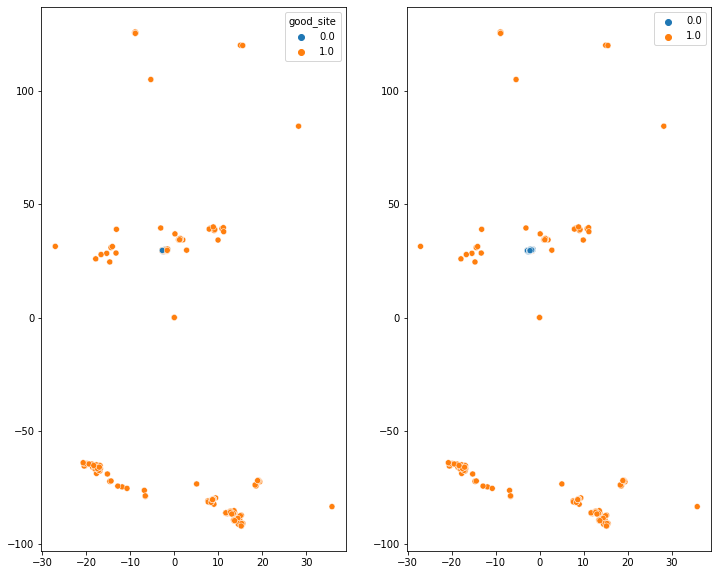

In [143]:
# Show before and after applying SMOTE:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

X = imputed
y = y_train

f, axes = plt.subplots(1, 2, figsize=(12,10))
sns.scatterplot(X[:,0],X[:,1],hue=y, ax=axes[0]);
sns.scatterplot(X_smote[:,0],X_smote[:,1],hue=y_smote, ax=axes[1]);
# sns.scatterplot(X_under[:,0],X_under[:,1],hue=y_over, ax=axes[1]);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


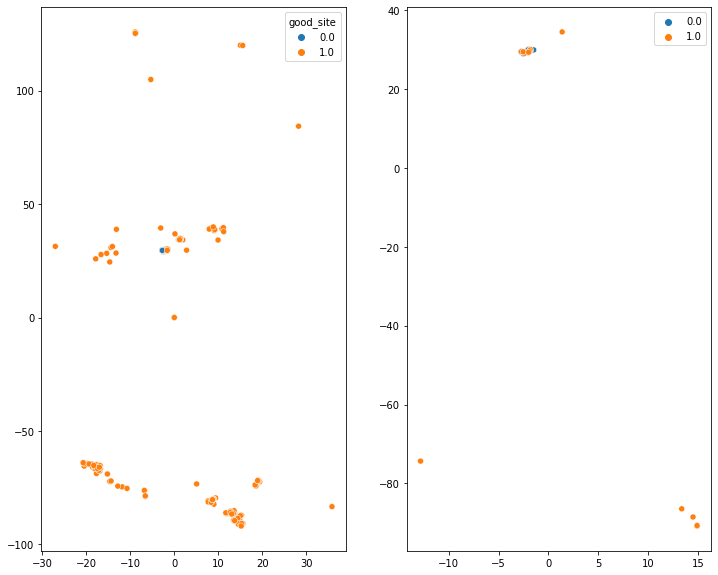

In [144]:
# Show before and after applying NearMiss:
f, axes = plt.subplots(1, 2, figsize=(12,10))
sns.scatterplot(X[:,0],X[:,1],hue=y, ax=axes[0]);
sns.scatterplot(X_nm[:,0],X_nm[:,1],hue=y_nm, ax=axes[1]);

In [145]:
# Before applying the model to the test, I will train all available data:
model = pipeline.fit(data[features], data['good_site'])
smote_model = smote_pipeline.fit(data[features], data['good_site'])
nm_model = nm_pipeline.fit(data[features], data['good_site'])

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/sklearn/utils/dep

In [146]:
# Apply the models to the test set:
test_prediction = model.predict(X_test)
test_smote_prediction = smote_model.predict(X_test)
test_nm_prediction = nm_model.predict(X_test)

In [147]:
# Models predictions:
test_prediction = pd.DataFrame(test_prediction, columns=['good_site'])
test_smote_prediction = pd.DataFrame(test_smote_prediction, columns=['good_site'])
test_nm_prediction = pd.DataFrame(test_nm_prediction, columns=['good_site'])

print("Normal Model:\n",test_prediction.value_counts())
print()
print("SMOTE Model:\n",test_smote_prediction.value_counts())
print()
print("NearMiss Model:\n",test_nm_prediction.value_counts())

Normal Model:
 good_site
0.0          1225
1.0           158
dtype: int64

SMOTE Model:
 good_site
0.0          1248
1.0           135
dtype: int64

NearMiss Model:
 good_site
0.0          1361
1.0            22
dtype: int64



# Perform PCA on the dataset and use k-means clustring

In [148]:
# Imports:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [172]:
k_data = data.copy()
km_data = k_data.drop(['good_site'], axis=1)
en_data = ce.OrdinalEncoder().fit_transform(km_data)
X = SimpleImputer(strategy = 'median').fit_transform(en_data)
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
labels = kmeans.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [173]:
# Add the labels to the dataset:
new_col = pd.Series(labels)
k_data['clusters'] = new_col.values

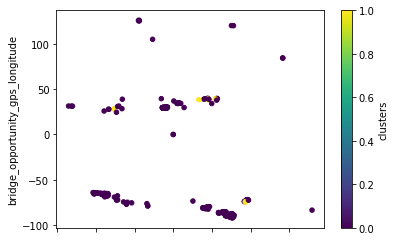

In [174]:
# Check the data after the kmeans:
k_data.plot.scatter('bridge_opportunity_gps_latitude', 'bridge_opportunity_gps_longitude', c='clusters', colormap = 'viridis')
plt.show()

In [181]:
# Check the accuracy:
(k_data['good_site'] == k_data['clusters']).value_counts()[0] / len(k_data)

0.9182242990654206

In [176]:
# standardize the dataset:
scaler = StandardScaler()
z = scaler.fit_transform(X)

# Create a PCA instance:
pca = PCA(.9)
components = pca.fit_transform(z)

In [177]:
# Convert the components to dataframe:
components = pd.DataFrame(components)
components.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.640441,-4.933211,1.101595,0.451684,-2.102790,0.088079,0.007337,-0.448164,-0.685285,-1.277904,0.874656,-0.531911,1.047684,-1.100808,-0.399558,-0.145254,-0.844084
1,1.747618,-5.272906,2.107897,-1.951919,-0.909500,1.003560,0.723271,0.010577,1.175371,1.035025,-0.527041,-0.051318,1.036116,-1.144952,1.960503,1.625620,-2.223627
2,3.486636,-5.193876,1.549523,-0.248330,-0.317518,1.363397,1.047488,0.594283,1.953562,0.049215,0.756560,-0.110022,0.339159,0.119768,0.300554,-0.673730,-0.578660
3,4.355609,-4.428612,1.576074,0.275402,-0.961290,0.795204,0.583653,1.065440,-0.223235,-1.157879,2.391751,-1.226618,-0.508300,-1.133703,1.444765,-1.236456,-0.388452
4,5.392526,-4.166444,1.499434,2.873305,-0.166753,1.376285,1.159023,1.315556,-0.013204,-0.332704,1.490844,-0.600993,-0.518672,-0.752756,-0.949368,-3.286574,1.447598


In [178]:
# Kmeans:
kmeans = KMeans(n_clusters= 2)
kmeans.fit(components)
components['pca_clusters'] = kmeans.labels_
k_data['pca_clusters'] = kmeans.labels_

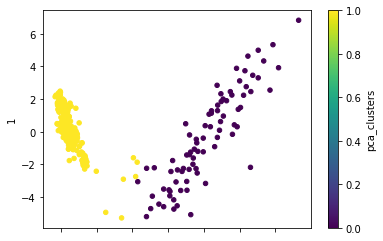

In [179]:
# Graph:
components.plot.scatter(0, 1, c='pca_clusters', colormap='viridis')
plt.show()

In [180]:
# the accuracy:
(k_data['good_site'] == k_data['pca_clusters']).value_counts()[1] / len(k_data)

0.8551401869158879

## Perform the PCA and k-means for test data

In [182]:
test = test.copy()
k_test = test.drop(['good_site'], axis=1)
en_test = ce.OrdinalEncoder().fit_transform(k_test)
X = SimpleImputer(strategy = 'median').fit_transform(en_test)

In [183]:
# PCA:
scaler = StandardScaler()
z = scaler.fit_transform(X)

# Create a PCA instance:
pca = PCA(.9)
components = pca.fit_transform(z)

# Convert the components to dataframe:
components = pd.DataFrame(components)

In [184]:
# Kmeans:
kmeans = KMeans(n_clusters= 2)
kmeans.fit(components)
components['pca_clusters'] = kmeans.labels_
test['pca_clusters'] = kmeans.labels_

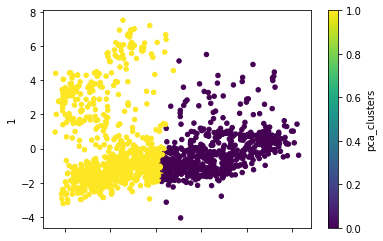

In [185]:
# Graph:
components.plot.scatter(0, 1, c='pca_clusters', colormap='viridis')
plt.show()

In [187]:
# Check the predictions:
test['pca_clusters'].value_counts()

1    810
0    573
Name: pca_clusters, dtype: int64